In [11]:
# Yahoo finance (n)

In [12]:
# Proszę wstawić print screen z np. jupyter notebooka, gdzie:
# - będą widoczne 2 wykresy ze średnią ruchomą (pandas, altair)
# - będzie widoczny kod, który wygenerował wykresy.

# Nazwa pliku (bez polskich znaków):
# Nazwisko_Imie_yahoo_niestacj.jpg

Data:
    
https://finance.yahoo.com/quote/CSV/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJjgOLcqSa79X2NVcDfaAsiL9BAHg5RvrFg6uir9MoKK8kw1oCE7Io1rINBuyWaJzgkx4TiRiOL_UMQKHk9Lp2Ne9IZ7hwh-3ettI5wsQEvlI2guv04Y0DrmkdAYNKm_baNDrq-DX0kN7r07wdmeKavlvqjoWZWgGPyncARRyqtG&guccounter=2

In [13]:
import re

import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def get_local_csv(path :str = "data/houses_data.csv") -> pd.DataFrame:
    """
    Loads csv file and returns it in my_data variable. Displays it's head.
        Parameters:
            path (str): Path to local file with extension. Must be '.csv'. Default = 'houses_data.csv'
        Returns:
            my_data (DataFrame): Variable that holds loaded DataFrame.
    """
    
    if not re.search(r"(.csv)", path):
        raise SyntaxError("Only .csv are files allowed")
    else:
        my_data = pd.read_csv(path)
        
    return my_data

In [15]:
def cut_my_df(source: pd.DataFrame, x: str, y: str, y_rolling=False, x_as_index=False) -> pd.DataFrame:
    """
    Reduces taken DataFrame to two columns (x, y) and calculates rolling mean for y values. 
    Could set x as index.
        Parameters:
            source (DataFrame): DataFrame with 2 and more columns. Default = my_data.
            x (array-like): Column name from source paremeter. Default = 'Date'. (Data)
            y (array-like): Column name from source paremeter. Default = 'Price'. (Price)
            y_rolling (bool): Calculates rolling mean for y values. Default = True.
            x_as_index (bool): If True, x must be datetime type. Default = True.  
        Returns:
            small_df (DataFrame): Global variable that holds calculated DataFrame.
    """
    
    small_df = pd.DataFrame()
    small_df[x] = source[x]
    small_df[y] = source[y]
    
    if y_rolling == True:
        small_df["Rolling"] = source[y].rolling(window=10).mean()
    
    if x_as_index == True:
        small_df.set_index(x, inplace=True)
    
    return small_df

In [16]:
def pd_sns_rolling_mean(source: pd.DataFrame, title: str = "title") -> plt:
    """ 
    Plots columns of taken DataFrame with scatter (first column) and line plot (second column). 
    Could set title.
        Parameters:
            source (DataFrame): DataFrame with max 2 columns. Index must be date. Default = small_df.
            title (str): Title of plot. Default = 'title'.
        Returns: Plot.
    """
    
    plt.figure(figsize=((13,8)))
    sns.scatterplot(x=source.index, y=source.iloc[:,0], color="red", label=source.columns[0])
    sns.lineplot(x=source.index, y=source.iloc[:,1], color="blue", label=source.columns[1])
    
    plt.xticks(rotation=90)
    plt.title(title)
    plt.grid()
    
    plt.savefig('yahoo_plots/pandas-rolling_mean.png')
    
    return plt.show()

In [17]:
def alt_rolling_mean(source: pd.DataFrame) -> plt:
    """
    Plots columns of taken DataFrame with scatter (first column) and line plot (second column). 
    Could set title.
        Parameters:
            source (DataFrame): DataFrame with max 2 columns. One of them must be date. Default = small_df.
        Returns: Plot.
    """
    
    alt.data_transformers.disable_max_rows()
    
    line = alt.Chart(source).mark_line(
        color='red',
        size=3
    ).transform_window(
        rolling_mean='mean(Price)',
        frame=[-10]
    ).encode(
        x='Date:T',
        y='rolling_mean:Q'
    )

    
    points = alt.Chart(source).mark_point().encode(
        x='Date:T',
        y=alt.Y('Price:Q',
                axis=alt.Axis(title='Prices'))
    ).properties(
    width=640,
    height=480)
    
    plot = line + points
    
    return plot.show()

In [18]:
def main():
    var1 = get_local_csv()
    var2 = cut_my_df(source=var1, x="Date", y="Price", y_rolling=True, x_as_index=True)
    print(var2)
    var3 = pd_sns_rolling_mean(source=var2, title="Prices of yahoo houses and rolling mean")
    var3

    var4 = cut_my_df(source=var1, x="Date", y="Price")
    print(var4)
    alt_rolling_mean(source=var4)

                Price    Rolling
Date                            
3/12/2016   1480000.0        NaN
4/02/2016   1035000.0        NaN
4/03/2017   1465000.0        NaN
4/03/2017    850000.0        NaN
4/06/2016   1600000.0        NaN
...               ...        ...
26/08/2017  1245000.0  1025200.0
26/08/2017  1031000.0  1003300.0
26/08/2017  1170000.0   988700.0
26/08/2017  2500000.0  1143600.0
26/08/2017  1285000.0  1139800.0

[13580 rows x 2 columns]


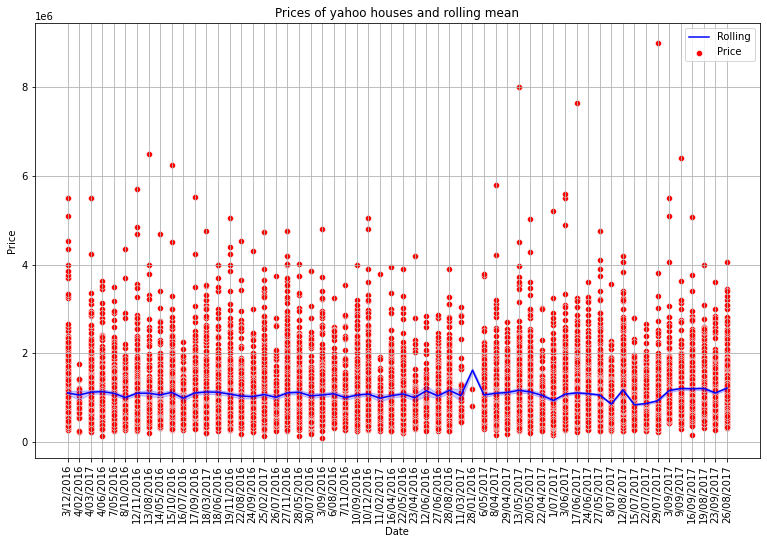

             Date      Price
0       3/12/2016  1480000.0
1       4/02/2016  1035000.0
2       4/03/2017  1465000.0
3       4/03/2017   850000.0
4       4/06/2016  1600000.0
...           ...        ...
13575  26/08/2017  1245000.0
13576  26/08/2017  1031000.0
13577  26/08/2017  1170000.0
13578  26/08/2017  2500000.0
13579  26/08/2017  1285000.0

[13580 rows x 2 columns]
Displaying chart at http://localhost:18640/


In [19]:
if __name__ == "__main__":
    main()

In [20]:
# # shell command convert .ipynb to .py
# !jupyter nbconvert --to python "yahoo_finance.ipynb"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook yahoo_finance.ipynb to python
[NbConvertApp] Writing 4645 bytes to yahoo_finance.py
